<a href="https://colab.research.google.com/github/Jengar21/c627/blob/main/CS627_Assignment5.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#  Document classification using Naive Bayes

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.impute import SimpleImputer
import tree

In [ ]:
# Read CSV file intro dataframe
df = pd.read_csv('data.csv')
df.head()
df['diagnosis']

,diagnosis
0,M
1,M
2,M
3,M
4,M
...,...
564,M
565,M
566,M
567,M


In [ ]:
# Drop empty values
# data.dropna(inplace = True)                        # M or B
list = ['Unnamed: 32','id']
data = df.drop(list, axis = 1)

# One hot encoding for target feature
def isMalignant(diagnosis):
    if diagnosis == 'M':
        return 1;
    return 0;

data['diagnosis_encoded'] = data['diagnosis'].apply(isMalignant)

data.head()


,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,diagnosis_encoded
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,1
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,1
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,1
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,1
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,1


#Data Visualization

Size:  18208
Shape:  (569, 32)


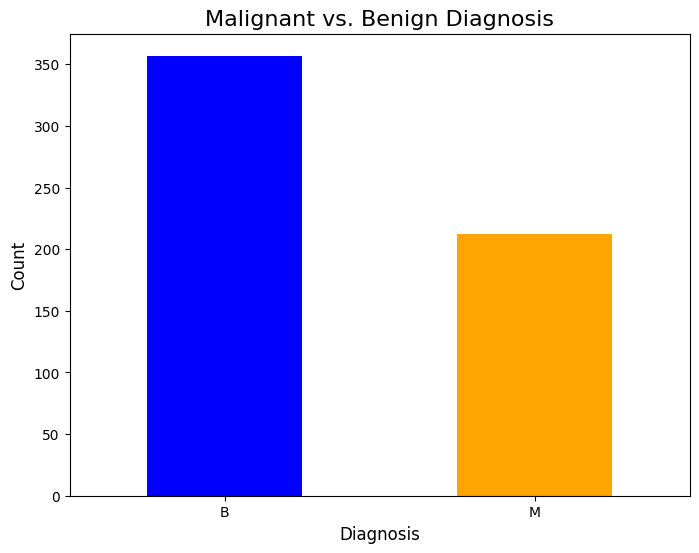

In [ ]:
# Data exploration
print("Size: ", data.size)
print("Shape: ", data.shape)
#data.dtypes
data.keys()

# Visualize data
# 1. Number of malignant vs benign rows
plt.figure(figsize=(8, 6))
diagnosis_counts = data['diagnosis'].value_counts()
diagnosis_counts.plot(kind='bar', color=['blue', 'orange'])
plt.title('Malignant vs. Benign Diagnosis', fontsize=16)  # Added fontsize
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Count', fontsize=12)
plt.xticks(rotation=0, fontsize=10)  # Added fontsize
plt.yticks(fontsize=10)
plt.show()

In [ ]:
# Pair plots show correlation and classification information
# The following graphs show an idea of how different values for texture_mean, radius_mean and smoothness_mean fall under Malignant or Beningn Diagnoses
#sns.pairplot(data[['texture_mean', 'radius_mean', 'smoothness_mean', 'diagnosis']] , hue='diagnosis', size = 3)

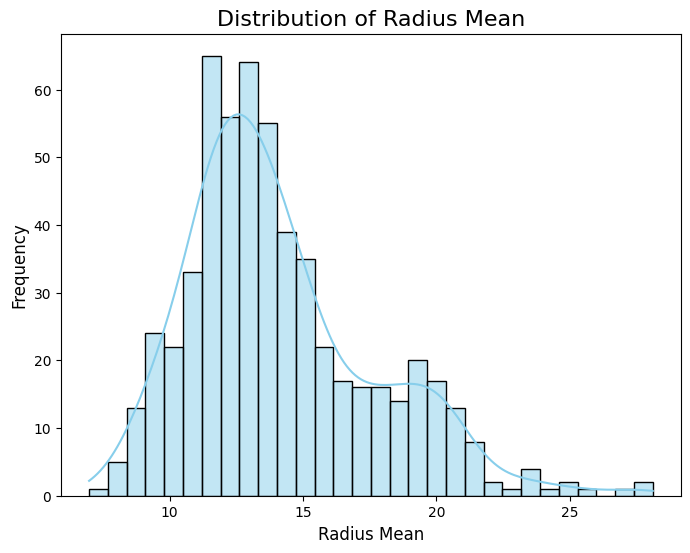

In [ ]:
# Visualize data
# 2. Histogram: Distribution of Radius Mean
plt.figure(figsize=(8, 6))
sns.histplot(data['radius_mean'], bins=30, kde=True, color='skyblue')  # Consistent color
plt.title('Distribution of Radius Mean', fontsize=16)
plt.xlabel('Radius Mean', fontsize=12)
plt.ylabel('Frequency', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

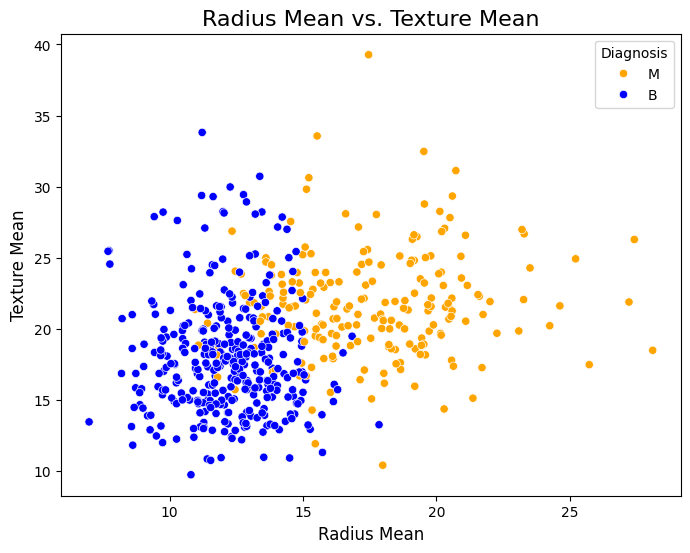

In [ ]:
# Visualize data
# 3. Scatter Plot: Radius Mean vs. Texture Mean (color-coded by diagnosis)
plt.figure(figsize=(8, 6))
sns.scatterplot(x='radius_mean', y='texture_mean', hue='diagnosis', data=data, palette={'M': 'orange', 'B': 'blue'}) # Custom colors # Changed data=data_normalized_standard to data=data
plt.title('Radius Mean vs. Texture Mean', fontsize=16)
plt.xlabel('Radius Mean', fontsize=12)
plt.ylabel('Texture Mean', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.legend(title='Diagnosis', fontsize=10)  # Legend styling
plt.show()

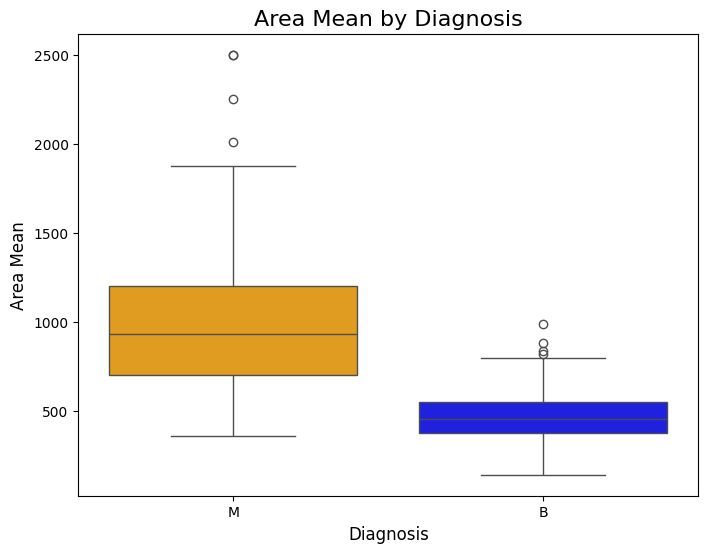

In [ ]:
# Visualize data
# 4. Box Plot: Area Mean by Diagnosis
plt.figure(figsize=(8, 6))
sns.boxplot(x='diagnosis', y='area_mean', hue='diagnosis', data=data, palette=['orange', 'blue'], legend=False)
plt.title('Area Mean by Diagnosis', fontsize=16)
plt.xlabel('Diagnosis', fontsize=12)
plt.ylabel('Area Mean', fontsize=12)
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

#Normalization, Feature/target Selection, Train/Test Split

In [ ]:
# Separate features and target variable
target = data['diagnosis_encoded']
features = data.drop(['diagnosis', 'diagnosis_encoded'], axis=1)

# Impute data
# from sklearn.impute import SimpleImputer

# imputer = SimpleImputer(strategy='mean') # mode, min, max, median, most_frequent
# data_imputed = imputer.fit_transform(features)

In [ ]:
# Selection of variables, Encoding, Normalization, Train-Test Split (K-fold Cross Validation)

# Select features (X) and target (y)
#features = data.drop('diagnosis', axis=1)
#target = data['diagnosis_encoded']

# Normalization
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# Train/Test Split (using train_test_split for simplicity)
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)

#Naive Bayes Approach

In [ ]:
# Naive Bayes approach
# We will use Gaussian Naive Bayes which is best for classification using numerical values

from sklearn.model_selection import KFold, cross_val_score
from sklearn.pipeline import make_pipeline
import numpy as np


# 5 Fold Cross validation
kF = KFold(n_splits=5, shuffle=True, random_state=42)

# Gaussian Naive Bayes
model = make_pipeline(
    GaussianNB()
)

X, y = features, target
cross_val_score(model, X, y.values.ravel(), cv = kF)

accuracy = np.average(cross_val_score(model, X,y.values.ravel(), cv = kF, scoring='accuracy'))
f1_score = np.average(cross_val_score(model, X,y, cv = kF, scoring='f1'))
precision = np.average(cross_val_score(model, X,y.values.ravel(), cv = kF, scoring='precision'))
recall = np.average(cross_val_score(model, X,y.values.ravel(), cv = kF, scoring='recall'))

print('Accuracy: ', accuracy)
print('F1 Score: ', f1_score)
print('Precision :', precision)
print('Recall: ', recall)

Accuracy:  0.9384567613724576
F1 Score:  0.9146157456708913
Precision : 0.9397182143368369
Recall:  0.8921296422813105


#Decision Tree Approach

Accuracy:  0.934979040521658
F1 Score:  0.9068192219679634
Precision : 0.9145233628160458
Recall:  0.9059273631568878


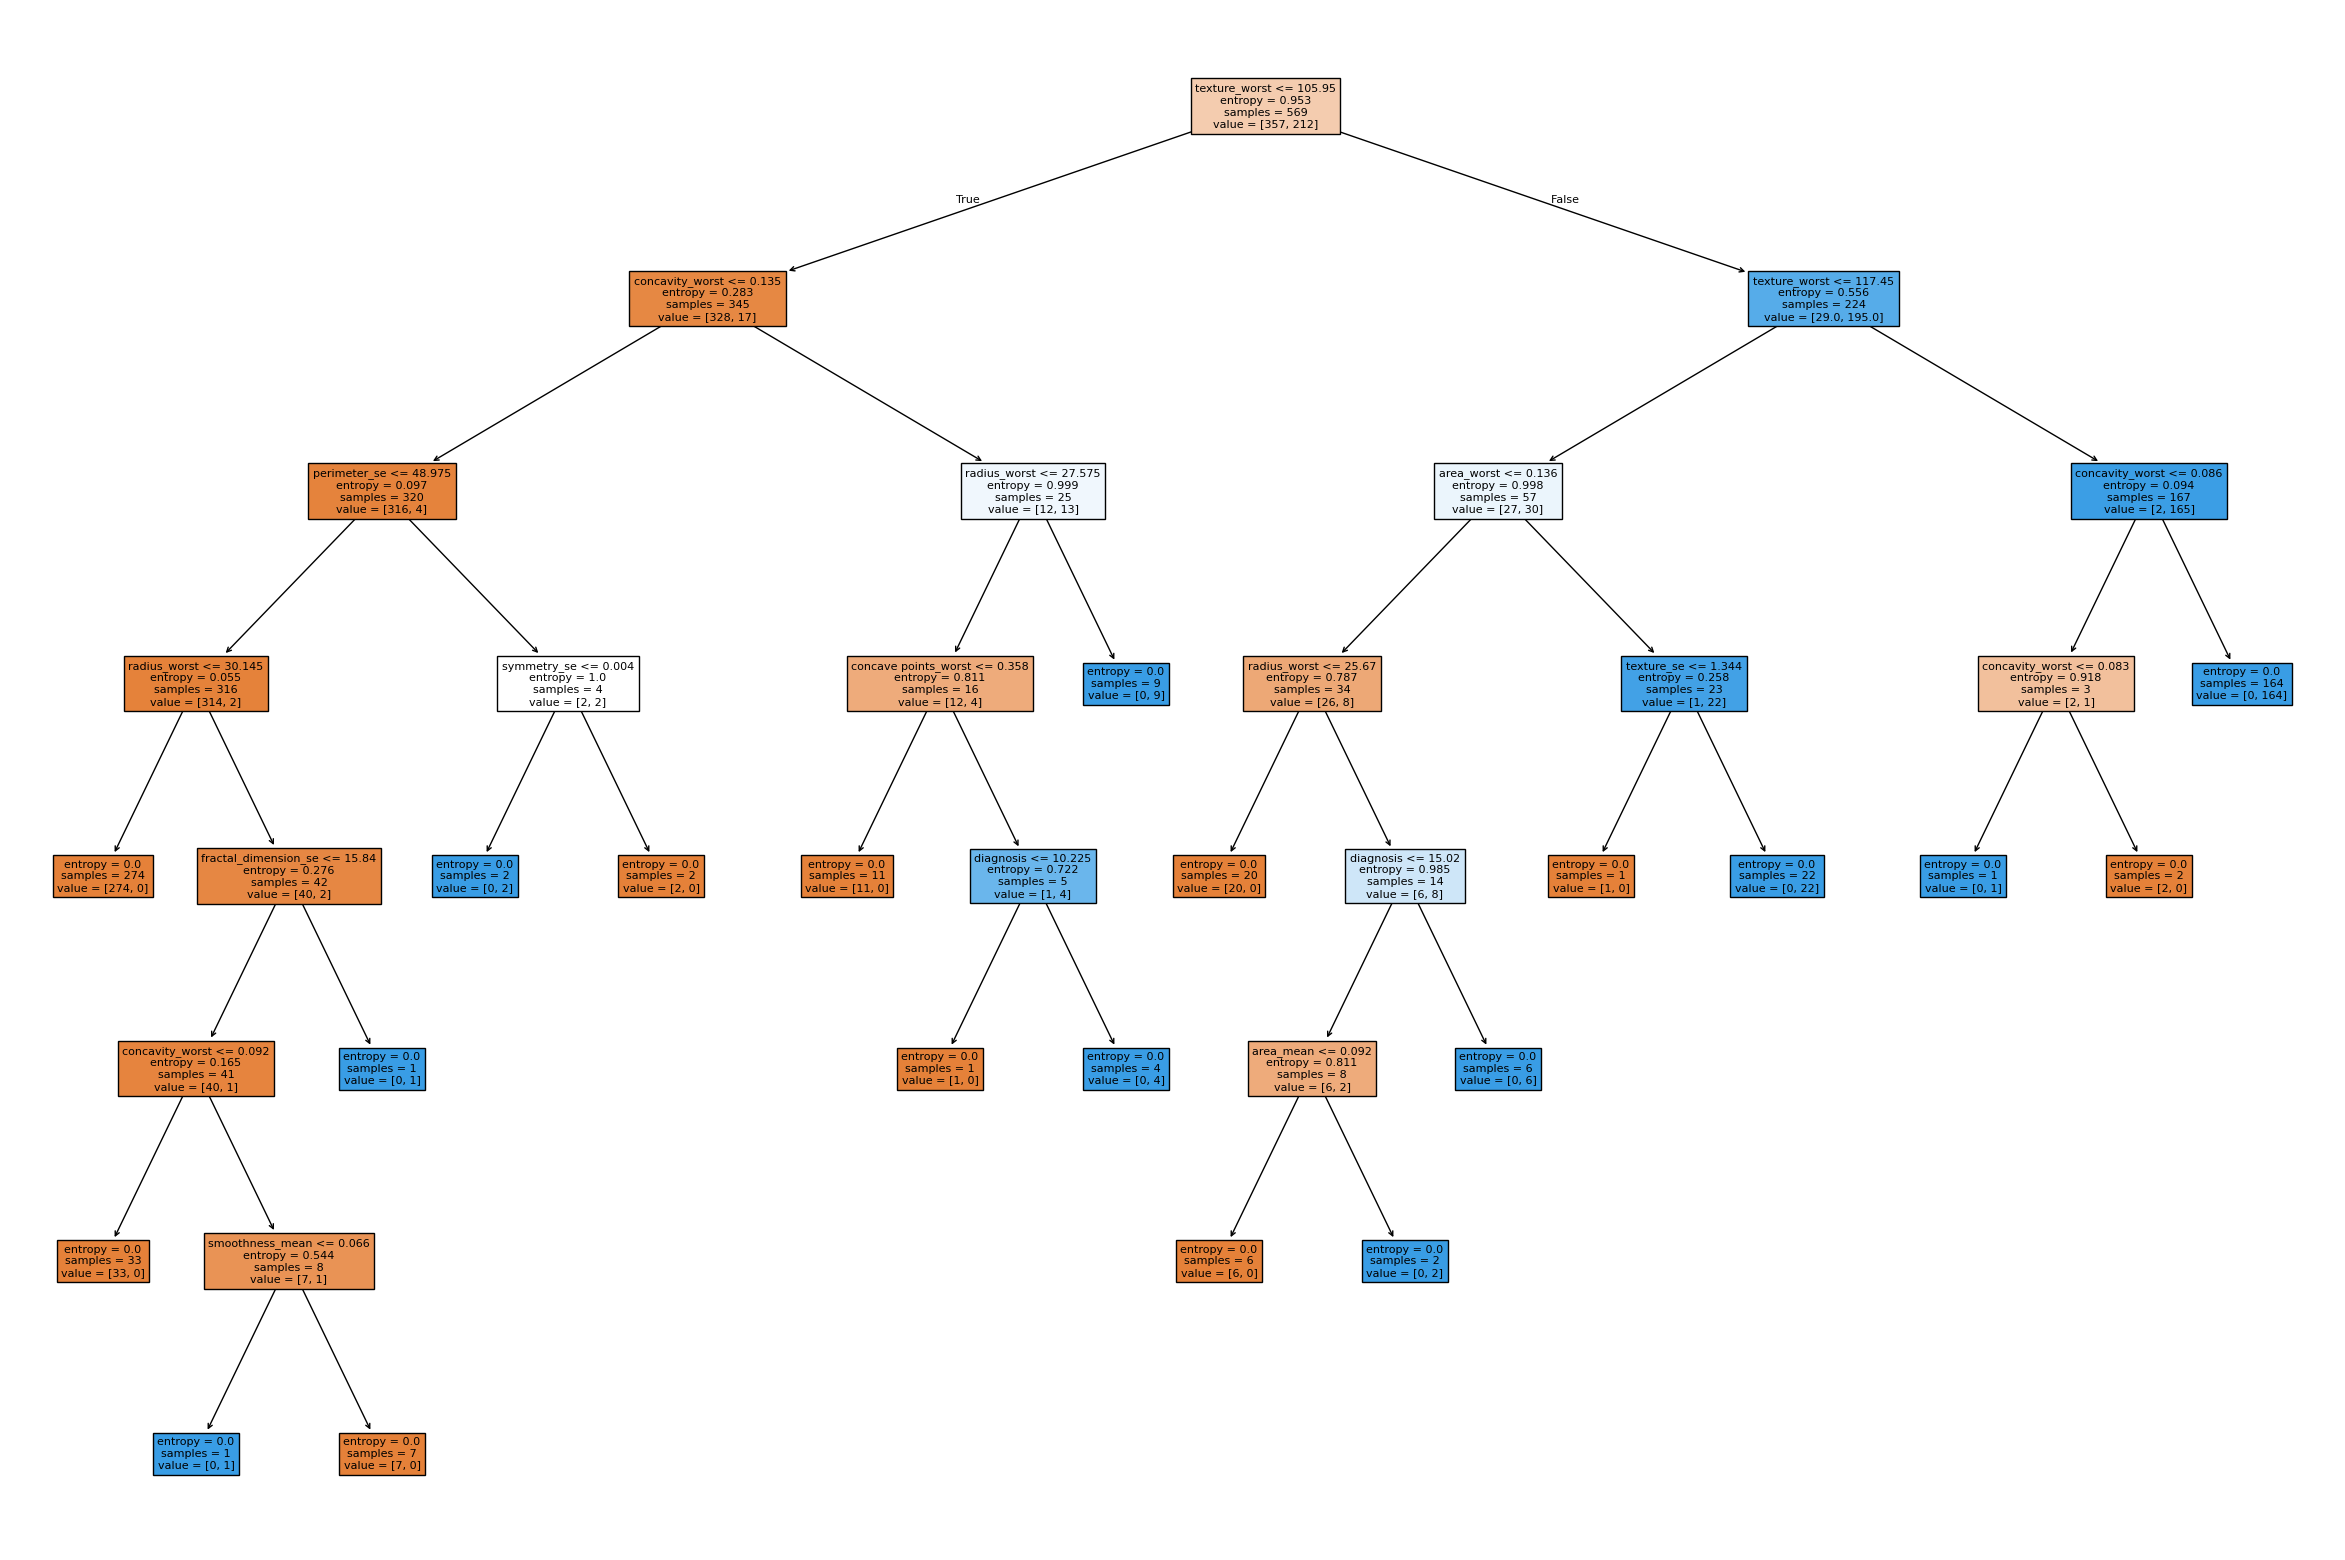

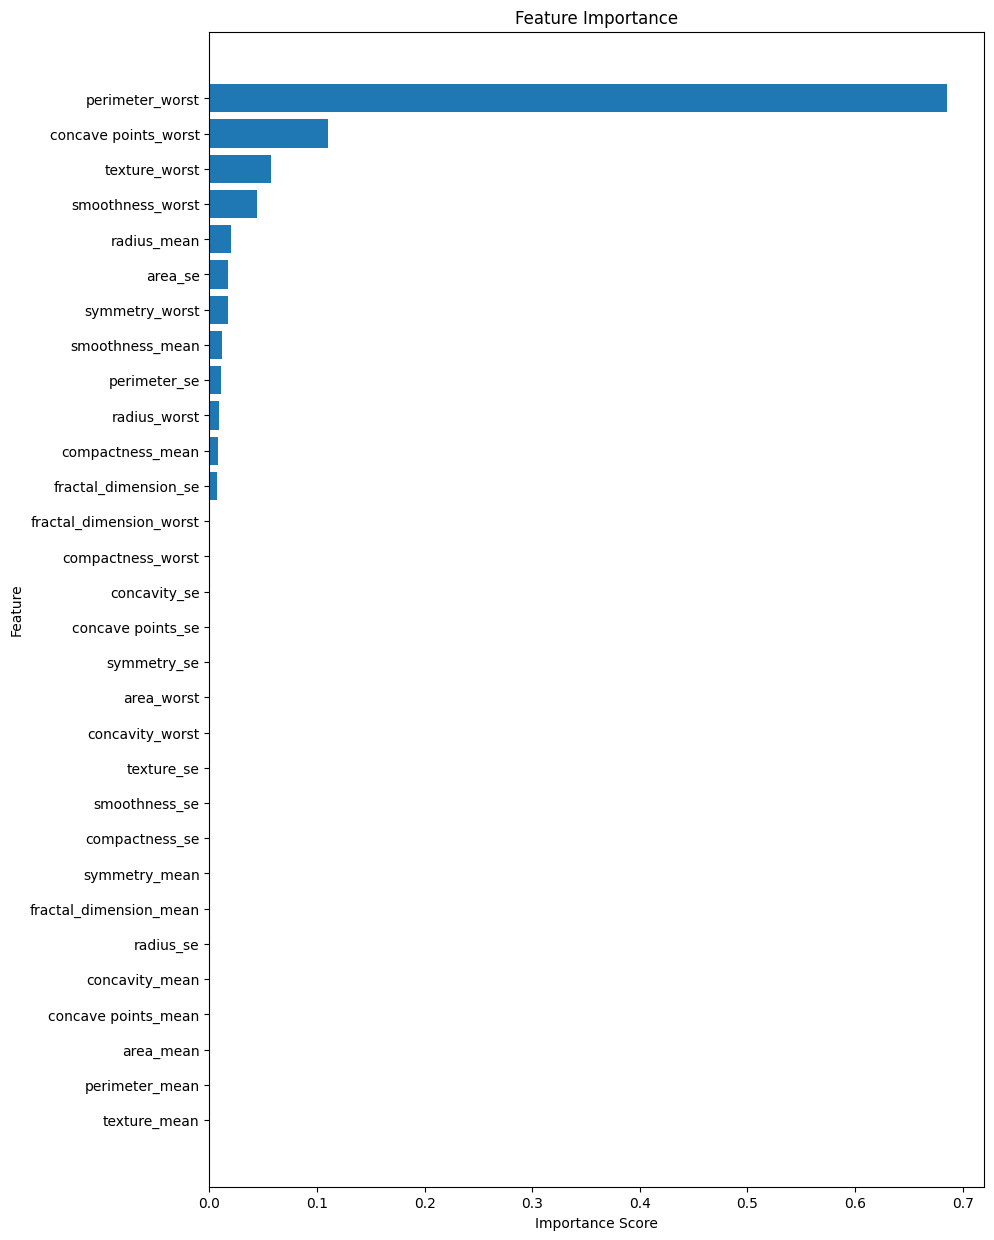

In [ ]:
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import matplotlib.pyplot as plt
import numpy as np
from sklearn.model_selection import KFold, cross_val_score


def plot_feature_importance(model, feature_names):
    """
    Plots feature importance from a Decision Tree model.

    Args:
        model: Trained DecisionTreeClassifier model.
        feature_names (list): List of feature names.
    """
    importances = model.feature_importances_
    indices = np.argsort(importances)  # Sort feature importances

    plt.figure(figsize=(10, len(feature_names) / 2))
    plt.title("Feature Importance")
    plt.barh(range(len(indices)), importances[indices], align="center")
    plt.yticks(range(len(indices)), [feature_names[i] for i in indices])
    plt.xlabel("Importance Score")
    plt.ylabel("Feature")
    plt.show()

# 5 Fold Cross validation
kF = KFold(n_splits=5, shuffle=True, random_state=42)

# Decision tree classifier model
model = DecisionTreeClassifier(criterion='entropy')

X, y = features, target

cross_val_score(model, X, y.values.ravel(), cv = kF)

accuracy = np.average(cross_val_score(model, X, y.values.ravel(), cv = kF, scoring='accuracy'))
f1_score = np.average(cross_val_score(model, X, y, cv = kF, scoring='f1'))
precision = np.average(cross_val_score(model, X, y, cv = kF, scoring='precision'))
recall = np.average(cross_val_score(model, X,y, cv = kF, scoring='recall'))

print('Accuracy: ', accuracy)
print('F1 Score: ', f1_score)
print('Precision :', precision)
print('Recall: ', recall)

model = model.fit(X, y.values.ravel()) # FIT THE MODEL

plt.figure(figsize=(30, 20))
tree.plot_tree(model, filled=True, feature_names=data.keys())
plt.show()

plot_feature_importance(model, features.columns) # FEATURE IMPORTANCE

#Manual Cross Validation for Decision Tree Approach


In [ ]:
# Starting point for manual cross validation for Decision Tree approach

import numpy as np
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import KFold, cross_val_score

# Load sample data
X, y = features, target

# Create decision tree classifier object
model = DecisionTreeClassifier(criterion='entropy')

# Define the K-fold cross-validator
k_folds = 5
kf = KFold(n_splits=k_folds, shuffle=True, random_state=42)

# Perform k-fold cross validation
scores = cross_val_score(model, X, y, cv=kf, scoring='accuracy')

# Print results
print(f"Cross-validation scores: {scores}")
print(f"Average accuracy: {scores.mean():.4f}")
print(f"Standard deviation: {scores.std():.4f}")

from sklearn.metrics import accuracy_score

# Manual K-fold cross validation
accuracies = []

for train_index, test_index in kf.split(X):
    # Split data using .iloc to select rows based on indices
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]

    # Train model
    model.fit(X_train, y_train) # Use the model variable defined earlier instead of dt_classifier

    # Make predictions
    y_pred = model.predict(X_test) # Use the model variable defined earlier instead of dt_classifier

    # Calculate accuracy
    accuracy = accuracy_score(y_test, y_pred)
    accuracies.append(accuracy)

    print(f"Fold accuracy: {accuracy:.4f}")

print(f"Average accuracy: {np.mean(accuracies):.4f}")

Cross-validation scores: [0.95614035 0.96491228 0.90350877 0.94736842 0.92035398]
Average accuracy: 0.9385
Standard deviation: 0.0230
Fold accuracy: 0.9474
Fold accuracy: 0.9386
Fold accuracy: 0.9035
Fold accuracy: 0.9298
Fold accuracy: 0.9292
Average accuracy: 0.9297


#Confusion Matrix and Correlation Heat Map of Features

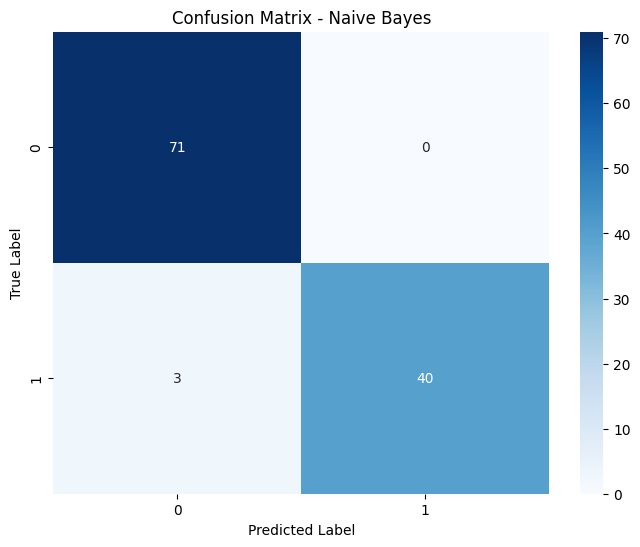

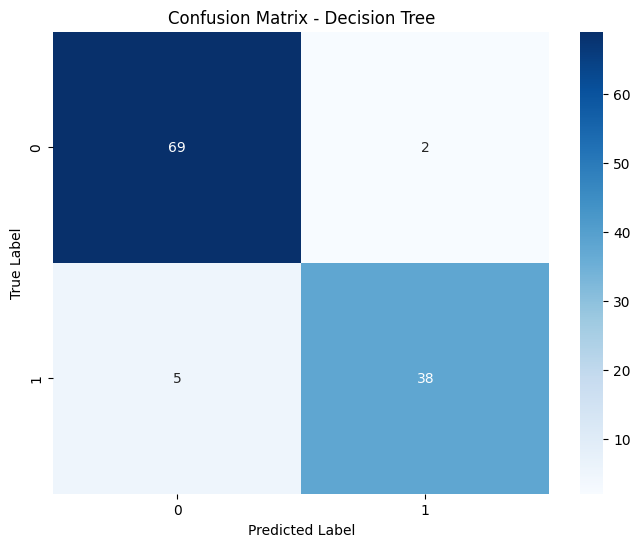

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split # Import train_test_split

def plot_confusion_matrix(y_true, y_pred, model_name="Model"):
    """
    Plots a confusion matrix.

    Args:
        y_true (array-like): Actual target values.
        y_pred (array-like): Predicted target values.
        model_name (str, optional): Name of the model for the plot title. Defaults to "Model".
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
    plt.title(f"Confusion Matrix - {model_name}")
    plt.xlabel("Predicted Label")
    plt.ylabel("True Label")
    plt.show()

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=42)

# Assuming 'model' is your Naive Bayes model from a previous cell
# Fit the Naive Bayes model
model_naive_bayes = GaussianNB()  # Or retrieve your existing Naive Bayes model
model_naive_bayes.fit(X_train, y_train)

# Generate predictions for Naive Bayes
y_pred_naive_bayes = model_naive_bayes.predict(X_test)

# Assuming 'model' is your Decision Tree model from a previous cell
# Fit the Decision Tree model
model_decision_tree = DecisionTreeClassifier(criterion='entropy')
model_decision_tree.fit(X_train, y_train)

# Generate predictions for Decision Tree
y_pred_decision_tree = model_decision_tree.predict(X_test)

# Example usage (after your model predictions)
plot_confusion_matrix(y_test, y_pred_naive_bayes, model_name="Naive Bayes")
plot_confusion_matrix(y_test, y_pred_decision_tree, model_name="Decision Tree")

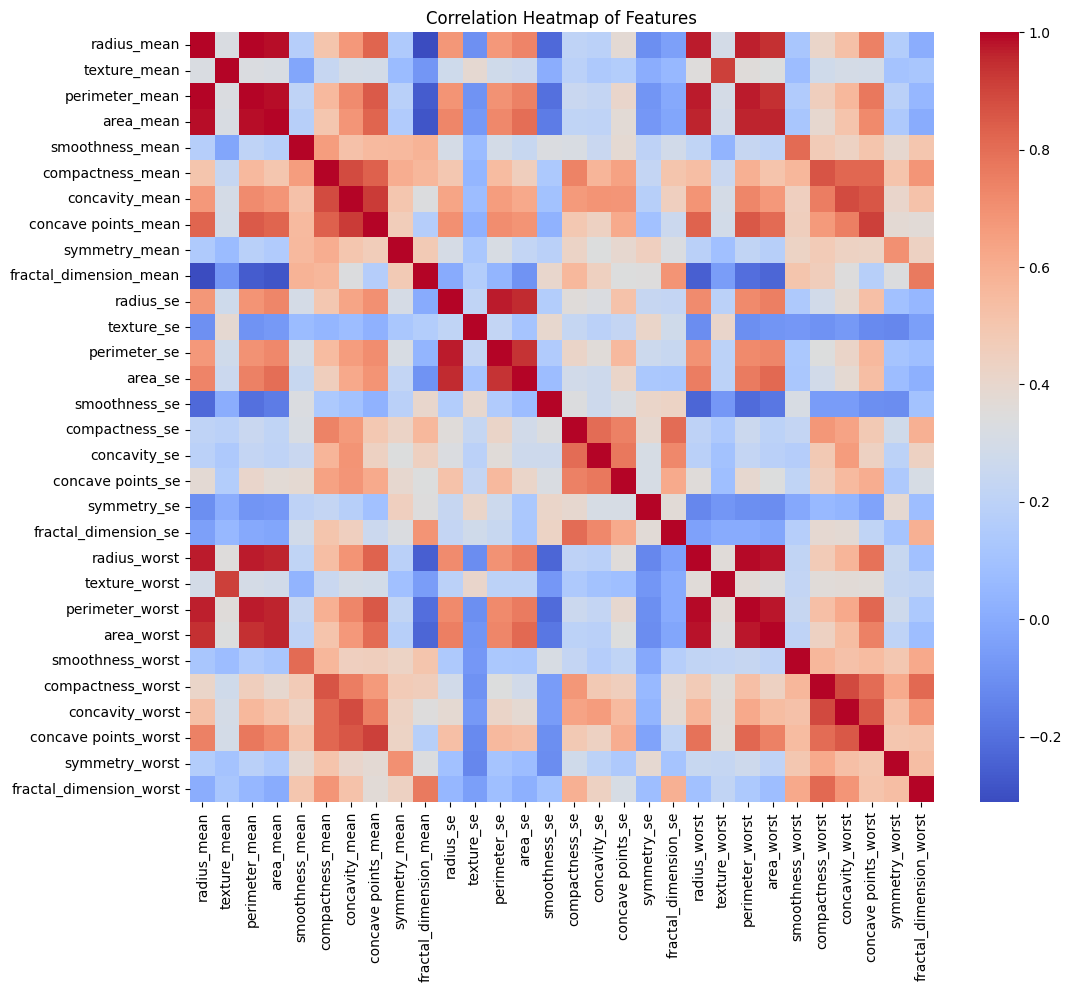

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate the correlation matrix
corr_matrix = features.corr()

# Create a heatmap
plt.figure(figsize=(12, 10)) # Adjust figure size as needed
sns.heatmap(corr_matrix, annot=False, cmap='coolwarm') # 'annot=True' displays correlation values, but can be overwhelming with many features
plt.title("Correlation Heatmap of Features")
plt.show()